# Final Project Template

For your final project, you are required to create an object detection and classification pipeline using the provided datasets. You will train a classification model using the included images and then apply this model for inference on the provided still image.

Here are the detailed steps for your project:

1) Begin by implementing one of the classic object detection techniques we have covered, such as HSV tracking, blob detection, edge detection. You can choose to employ one technique or combine multiple ones. The goal is to create bounding boxes around objects within the scene. To facilitate the classification step, ensure that all bounding boxes are in the form of rectangles.&nbsp;

2) Utilize the provided images to train a Convolutional Neural Network (CNN) model for the classification of the objects within the bounding boxes. You can use Google Colab to train larger models that require a GPU. We will discuss the specifics of this process in class.&nbsp;

3) Finally, render the final still image with bounding boxes and text that display the classification label of the object contained within each box.

We will build and discuss small examples of each step in this project to help you successfully complete it.

Submit a notebook with your all your model training and object detection steps.&nbsp; Also include your model in ".keras" or ".tf" format.

The datasets (choose one, you don't have to do both!):

1) Car/Truck/Airplane

2) Dog/Bird/Deer



Notes:

1) You are creating a small model which can classify small images.&nbsp; &nbsp;Follow the basic structure and format we discussed in class.&nbsp;

2) Your models will not be perfect, averaging around 75% accuracy,&nbsp; and mislabeling will happen.&nbsp; Concentrate on your object detection pipeline to create bounding boxes and then passing the image data to your model for classification.&nbsp;

3) Make sure your bounding boxes are sized correctly for your model.

4) If you normalize your image data (0-1) then you need to normalize the images from your bounding boxes before you pass them to your model.

5) Your models will be trained with labels as integer values and will need to be mapped to your class names.&nbsp; "Deer", "Dog" ... etc.&nbsp;&nbsp;

In [2]:

import tensorflow as tf

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))



Num GPUs Available:  0


## Model Training

In [ ]:
# Code for your model goes here
# i manually unzipped files into train folder

#import libraries
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os


In [ ]:
# Load the images from the directory
def load_images_from_folder(train):
    images = []
    for filename in os.listdir(train):
        img = cv2.imread(os.path.join(train, filename))
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
            images.append(img)
    return images

# The folder paths your images are located in.  You will change these for your directories.
folder_paths = ['train/dog', 'train/bird', 'train/deer']


# The class names/labels of your images.
class_labels = {'dog': 0, 'bird': 1, 'deer': 2}

# The lists to store your images and labels in.
x_train = []
y_train = []

# Load the images and labels into the lists.
for folder_path in folder_paths:
    class_name = os.path.basename(folder_path)
    class_id = class_labels[class_name]
    images = load_images_from_folder(folder_path)

    # Extend the lists to add the images and labels from the loaded folder.
    x_train.extend(images)
    y_train.extend([class_id] * len(images))

# Convert the loaded lists into numpy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

In [ ]:
# Print the shape of the training data
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")

# Print the first 10 labels
print(f"Sample labels: {y_train[:10]}")

x_train shape: (15000, 64, 64, 3)
y_train shape: (15000,)
Sample labels: [0 0 0 0 0 0 0 0 0 0]


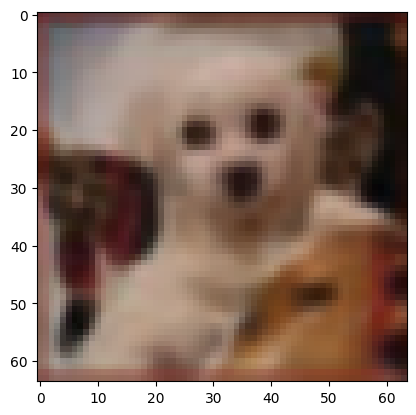

In [ ]:
plt.imshow(x_train[0])

In [ ]:
# Check the corresponding label for the image above. Change the index to view different labels.
#prints out 0 which means dog. we're good.
print(y_train[0])

0


In [ ]:
print(x_train[0])

[[[ 97  44  47]
  [101  48  54]
  [ 93  55  55]
  ...
  [ 54  19  14]
  [ 66  22  17]
  [ 64  30  23]]

 [[106  52  53]
  [107  55  62]
  [ 94  60  64]
  ...
  [ 52  21  16]
  [ 65  21  16]
  [ 72  26  17]]

 [[104  67  66]
  [109  72  77]
  [ 88  80  78]
  ...
  [ 44  27  15]
  [ 74  37  24]
  [ 77  39  24]]

 ...

 [[140 107  94]
  [147 113 102]
  [156 136 122]
  ...
  [ 65  39  37]
  [ 49  30  27]
  [ 47  29  23]]

 [[137  89  80]
  [140  90  85]
  [145 106  98]
  ...
  [ 97  54  49]
  [ 84  44  42]
  [ 74  37  35]]

 [[129  84  78]
  [133  84  79]
  [137 101  92]
  ...
  [111  63  55]
  [100  57  49]
  [ 84  51  49]]]


In [ ]:
x_train = x_train.astype('float32') / 255.0

In [ ]:
import tensorflow as tf

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Num GPUs Available:  0
Please install GPU version of TF


In [ ]:
# Let's build out model.

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
# import to_categorical from tensorflow
from tensorflow.keras.utils import to_categorical
# save each epoch of the model
from keras.callbacks import ModelCheckpoint

# Define the checkpoint callback
checkpoint_path = "best_model.tf"
checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max', save_weights_only=False)

# Define the VGG16 architecture
model = keras.Sequential([
    # Block 1
    Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(64,64,3)),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=(2,2)),

    # Block 2
    Conv2D(128, (3,3), activation='relu', padding='same'),
    Conv2D(128, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=(2,2)),

    # Block 3
    Conv2D(256, (3,3), activation='relu', padding='same'),
    Conv2D(256, (3,3), activation='relu', padding='same'),
    Conv2D(256, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=(2,2)),

    # Block 4
    Conv2D(512, (3,3), activation='relu', padding='same'),
    Conv2D(512, (3,3), activation='relu', padding='same'),
    Conv2D(512, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=(2,2)),

    # Block 5
    Conv2D(512, (3,3), activation='relu', padding='same'),
    Conv2D(512, (3,3), activation='relu', padding='same'),
    Conv2D(512, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=(2,2)),

    # Fully connected layers
    Flatten(),
    Dense(4096, activation='relu'),
    Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=100,  batch_size=32, shuffle=True, validation_split=0.1, callbacks=[checkpoint])

Epoch 1/100


203/422 [=============>................] - ETA: 1:11 - loss: 1.0884 - accuracy: 0.3781

KeyboardInterrupt: 

# Model Evaluation

In [ ]:
# Code showing the accuracy of your model.

# Object Detection

In [ ]:
# Code for your object detector goes here

# Classification of Detected Objects

In [ ]:
# Render a final image showing the result of your object detector with bounding boxes and labels on the original image.

# Text properties
# text = "image label"
# position = (50, 50)  # x, y coordinates
# font = cv2.FONT_HERSHEY_SIMPLEX
# font_scale = 1
# color = (255, 255, 255)  # White color in BGR
# thickness = 2

# Put the text on the image
# cv2.putText(image, text, position, font, font_scale, color, thickness)